In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
Y_train = pd.read_csv('../data/Y_train.csv')
Y_test = pd.read_csv('../data/Y_test.csv')

FS_DT = pd.read_csv('../data/FS_decision_tree.csv').values.flatten()
FS_RF = pd.read_csv('../data/FS_random_forest.csv').values.flatten()

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2341, 142), (586, 142), (2341, 1), (586, 1))

# Simple vector machines

In [2]:
svr = SVR()
parameters = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
tuned_model = GridSearchCV(svr, parameters, cv=5, verbose=0)
tuned_model.fit(X_train, Y_train.values.ravel())

print ("Best Score: {:.3f}".format(tuned_model.best_score_) )
print ("Best Params: ", tuned_model.best_params_)

train_pre = tuned_model.predict(X_train)
test_pre = tuned_model.predict(X_test)

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Best Score: 0.781
Best Params:  {'C': 10.0}
Train MSE: 882119834.121
Test MSE: 875459596.556
Train R^2: 0.852
Test R^2: 0.891


Text(0, 0.5, 'Sale_Price')

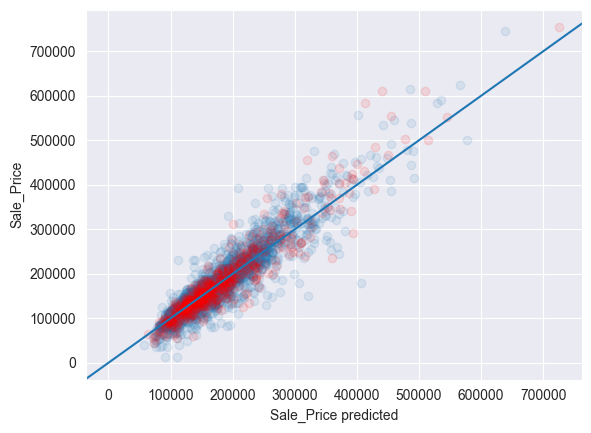

In [3]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

# Proviamo a ridurre le features

In [4]:
svr = SVR()
parameters = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
tuned_model = GridSearchCV(svr, parameters, cv=5, verbose=0)
tuned_model.fit(X_train[FS_RF], Y_train.values.ravel())

print ("Best Score: {:.3f}".format(tuned_model.best_score_) )
print ("Best Params: ", tuned_model.best_params_)

train_pre = tuned_model.predict(X_train[FS_RF])
test_pre = tuned_model.predict(X_test[FS_RF])

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Best Score: 0.779
Best Params:  {'C': 10.0}
Train MSE: 892609241.903
Test MSE: 864215085.066
Train R^2: 0.850
Test R^2: 0.893


Text(0, 0.5, 'Sale_Price')

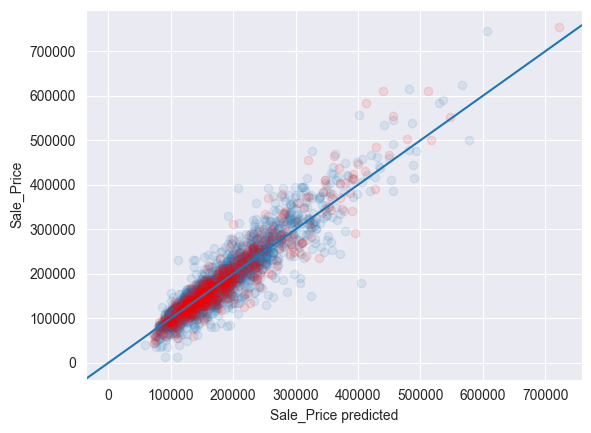

In [5]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')